In [1]:
import numpy as np
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

import sys; sys.path.append('../')
from src.tools import get_files, get_latents, align

%load_ext autoreload
%autoreload 2

In [2]:
name_dict = {
    'Gradients 0':'Gradient 1',
    'Gradients 1':'Gradient 2',
    'Gradients 2':'Gradient 3',
    'Gradients (0, 1)':'Gradients 1,2',
    'Gradients (1, 2)':'Gradients 2,3',
    'Gradients (2, 0)':'Gradients 1,3',
    'Gradients (0, 1, 2)':'Gradients 1,2,3',
    'Gradients 0':'Gradient 1',
    'Gradients 1':'Gradient 2',
    'Gradients 2':'Gradient 3',
    'Gradients (0, 1)':'Gradients 1,2',
    'Gradients (1, 2)':'Gradients 2,3',
    'Gradients (2, 0)':'Gradients 1,3',
    'Gradients (0, 1, 2)':'Gradients 1,2,3',
    'Experts Resting vs. Experts Compassion':['EXP','res', 'EXP','com'],
    'Experts Resting vs. Experts Open Monitoring':['EXP','res', 'EXP','o m'],
    'Experts Open Monitoring vs. Experts Compassion':['EXP','o m', 'EXP','com'],
    'Experts Resting vs. Experts Meditating':['EXP','res', 'EXP','med'],
    'Novices Resting vs. Novices Compassion':['NOV','res', 'NOV','com'],
    'Novices Resting vs. Novices Open Monitoring':['NOV','res', 'NOV','o m'],
    'Novices Open Monitoring vs. Novices Compassion':['NOV','o m', 'NOV','com'],
    'Novices Resting vs. Novices Meditating':['NOV','res', 'NOV','med'],
    'Experts Resting vs. Novices Resting':['EXP','res', 'NOV','res'],
    'Experts Compassion vs. Novices Compassion':['EXP','com', 'NOV','com'],
    'Experts Open Monitoring vs. Novices Open Monitoring':['EXP','o m', 'NOV','o m'],
    'Experts Meditating vs. Novices Meditating':['EXP','med', 'NOV','med'],
    'Experts All vs. Novices All':['EXP','all', 'NOV','all'],
    'Experts Resting vs. Novices Compassion':['EXP','res', 'NOV','com'],
    'Experts Resting vs. Novices Open Monitoring':['EXP','res', 'NOV','o m'],
    'Experts Compassion vs. Novices Resting':['EXP','com', 'NOV','res'],
    'Experts Compassion vs. Novices Open Monitoring':['EXP','com', 'NOV','o m'],
    'Experts Open Monitoring vs. Novices Resting':['EXP','o m', 'NOV','res'],
    'Experts Open Monitoring vs. Novices Compassion':['EXP','o m', 'NOV','com'],
    'Resting vs. Compassion':['ALL','res', 'ALL','com'],
    'Resting vs. Open Monitoring':['ALL','res', 'ALL','o m'],
    'Compassion vs. Open Monitoring':['ALL','com', 'ALL','o m'],
    'Resting vs. Meditating':['ALL','res', 'ALL','med'],
    '6-sample ([[0], [1], [2], [3], [4], [5]])': '6-sample All',
    '3-sample ([[0], [1], [2]])': '3-sample EXP',
    '3-sample ([[3], [4], [5]])': '3-sample NOV'
}

label_dict = {
    'EXP':'EXP',
    'NOV':'NOV',
    'ALL':'ALL',
    'o m': 'open',
    'med':'med ',
    'res':'rest',
    'com':'comp',
    'all':'all '
}

In [15]:
data_dir = Path('../data/DCORR_dmap_mapalign_replication-csv_align-5_01-09')
files = [
    "6-sample_results_dict_1000.pkl",
    "3E-sample_results_dict_10000.pkl",
    "3N-sample_results_dict_10000.pkl",
    "2-sample_results_dict_10000.pkl",
]

tests_dict = {}

for fname in files:
    with open(data_dir / fname, 'rb') as handle:
        tests_dict.update(pickle.load(handle))

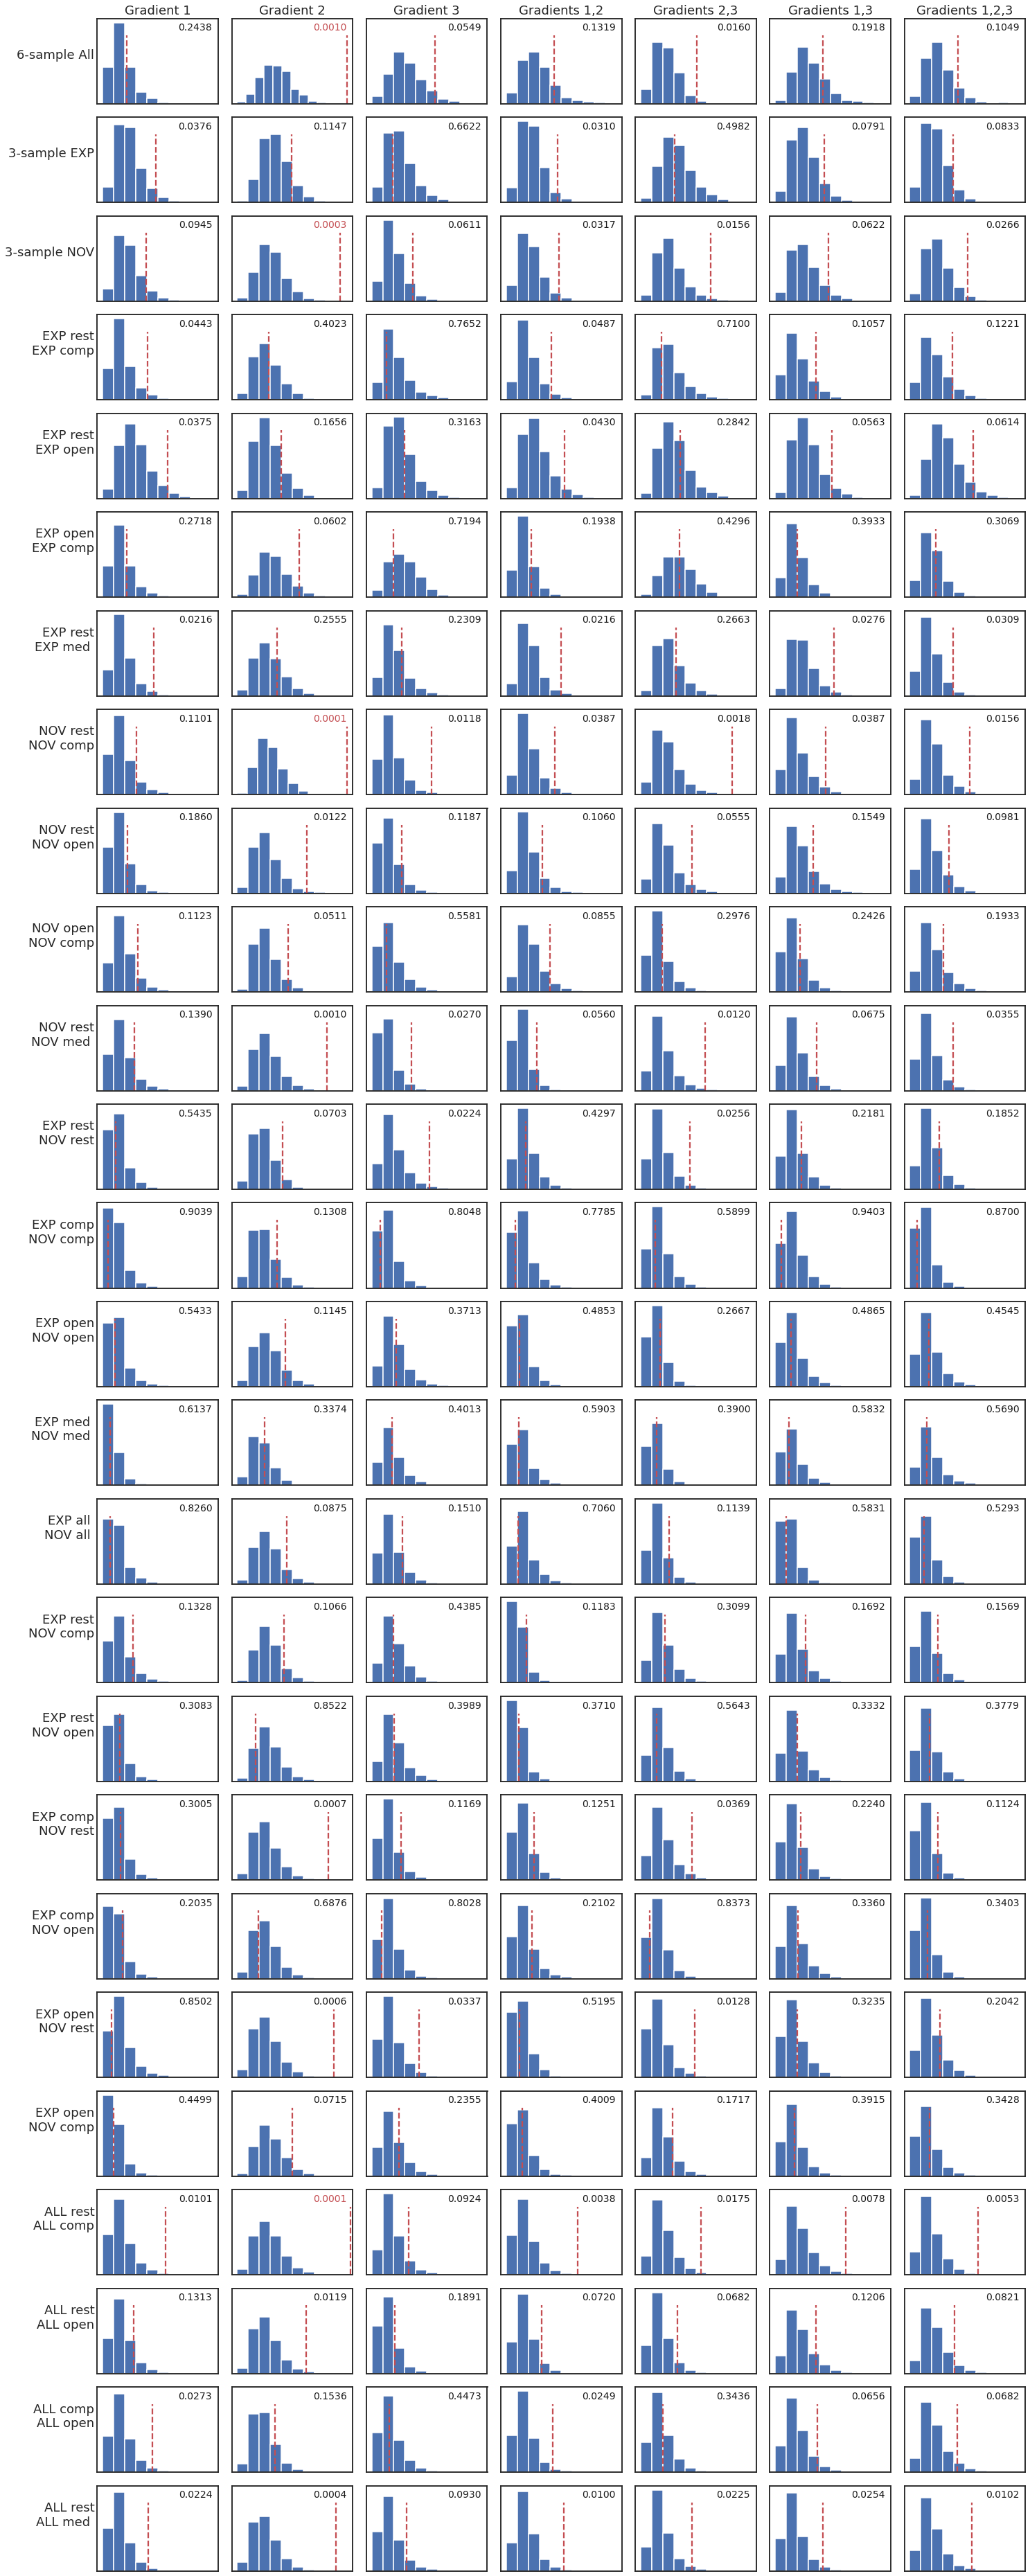

In [10]:
nrows = len(tests_dict.keys())
fig, axes = plt.subplots(nrows, 7, sharex=False, sharey='row', figsize=(21,int(2*nrows)))
axes = axes.reshape(-1, 7)

for row, (test_key, test_dict) in enumerate(tests_dict.items()):
    test_name = name_dict[test_key]
    if isinstance(test_name, list):
        test_name = "{} {}\n{} {}".format(
            *[label_dict[label] for label in test_name])
    
    if '6' in test_name:
        scale = 7
    elif '3' in test_name:
        scale = 7 * 2
    else:
        scale = 7 * (nrows - 3)
        
    for col, (grad_key, grad_dict) in enumerate(test_dict.items()):
        ax = axes[row, col]
    
        ax.hist(grad_dict['null_dist']) #Histogram
        ax.axvline(grad_dict['test_stat'], c='r', ls='--', ymax=0.8) # Test stat
        
        pvalue = grad_dict['pvalue']
        ax.annotate(f"{pvalue:.4f}", xy=(0.95, 0.95), xycoords='axes fraction',
                    ha='right', va='top', size=14, c='r' if pvalue < 0.05 / scale else 'k')#, bbox=dict(boxstyle='square', fc='w'))
        # ax.set_title(f'{key} ({grad_key}): pval={data_dict[test_key][grad_key]["pvalue"]}') #

        if row == 0:
            ax.set_title(name_dict[f"Gradients {grad_key}"])
        ax.set_xticks([])
        ax.set_yticks([])
    axes[row, 0].set_ylabel(test_name, rotation='horizontal', ha='right')

# for ax in axes[-1, :]:
#     plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
# fig.subplots_adjust(hspace=0.4)
# fig.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.savefig(data_dir / "DCORR_gcca_raw_ZG3-min_normed_nulldists.pdf")
plt.show()

In [13]:
data_dir = Path('../data/DCORR_gcca_raw_ZG3-min_normed')
files = [
    "6-sample_results_dict_1000.pkl",
    "3E-sample_results_dict_10000.pkl",
    "3N-sample_results_dict_10000.pkl",
    "2-sample_results_dict_10000.pkl",
]

tests_dict = {}

for fname in files:
    with open(data_dir / fname, 'rb') as handle:
        tests_dict.update(pickle.load(handle))

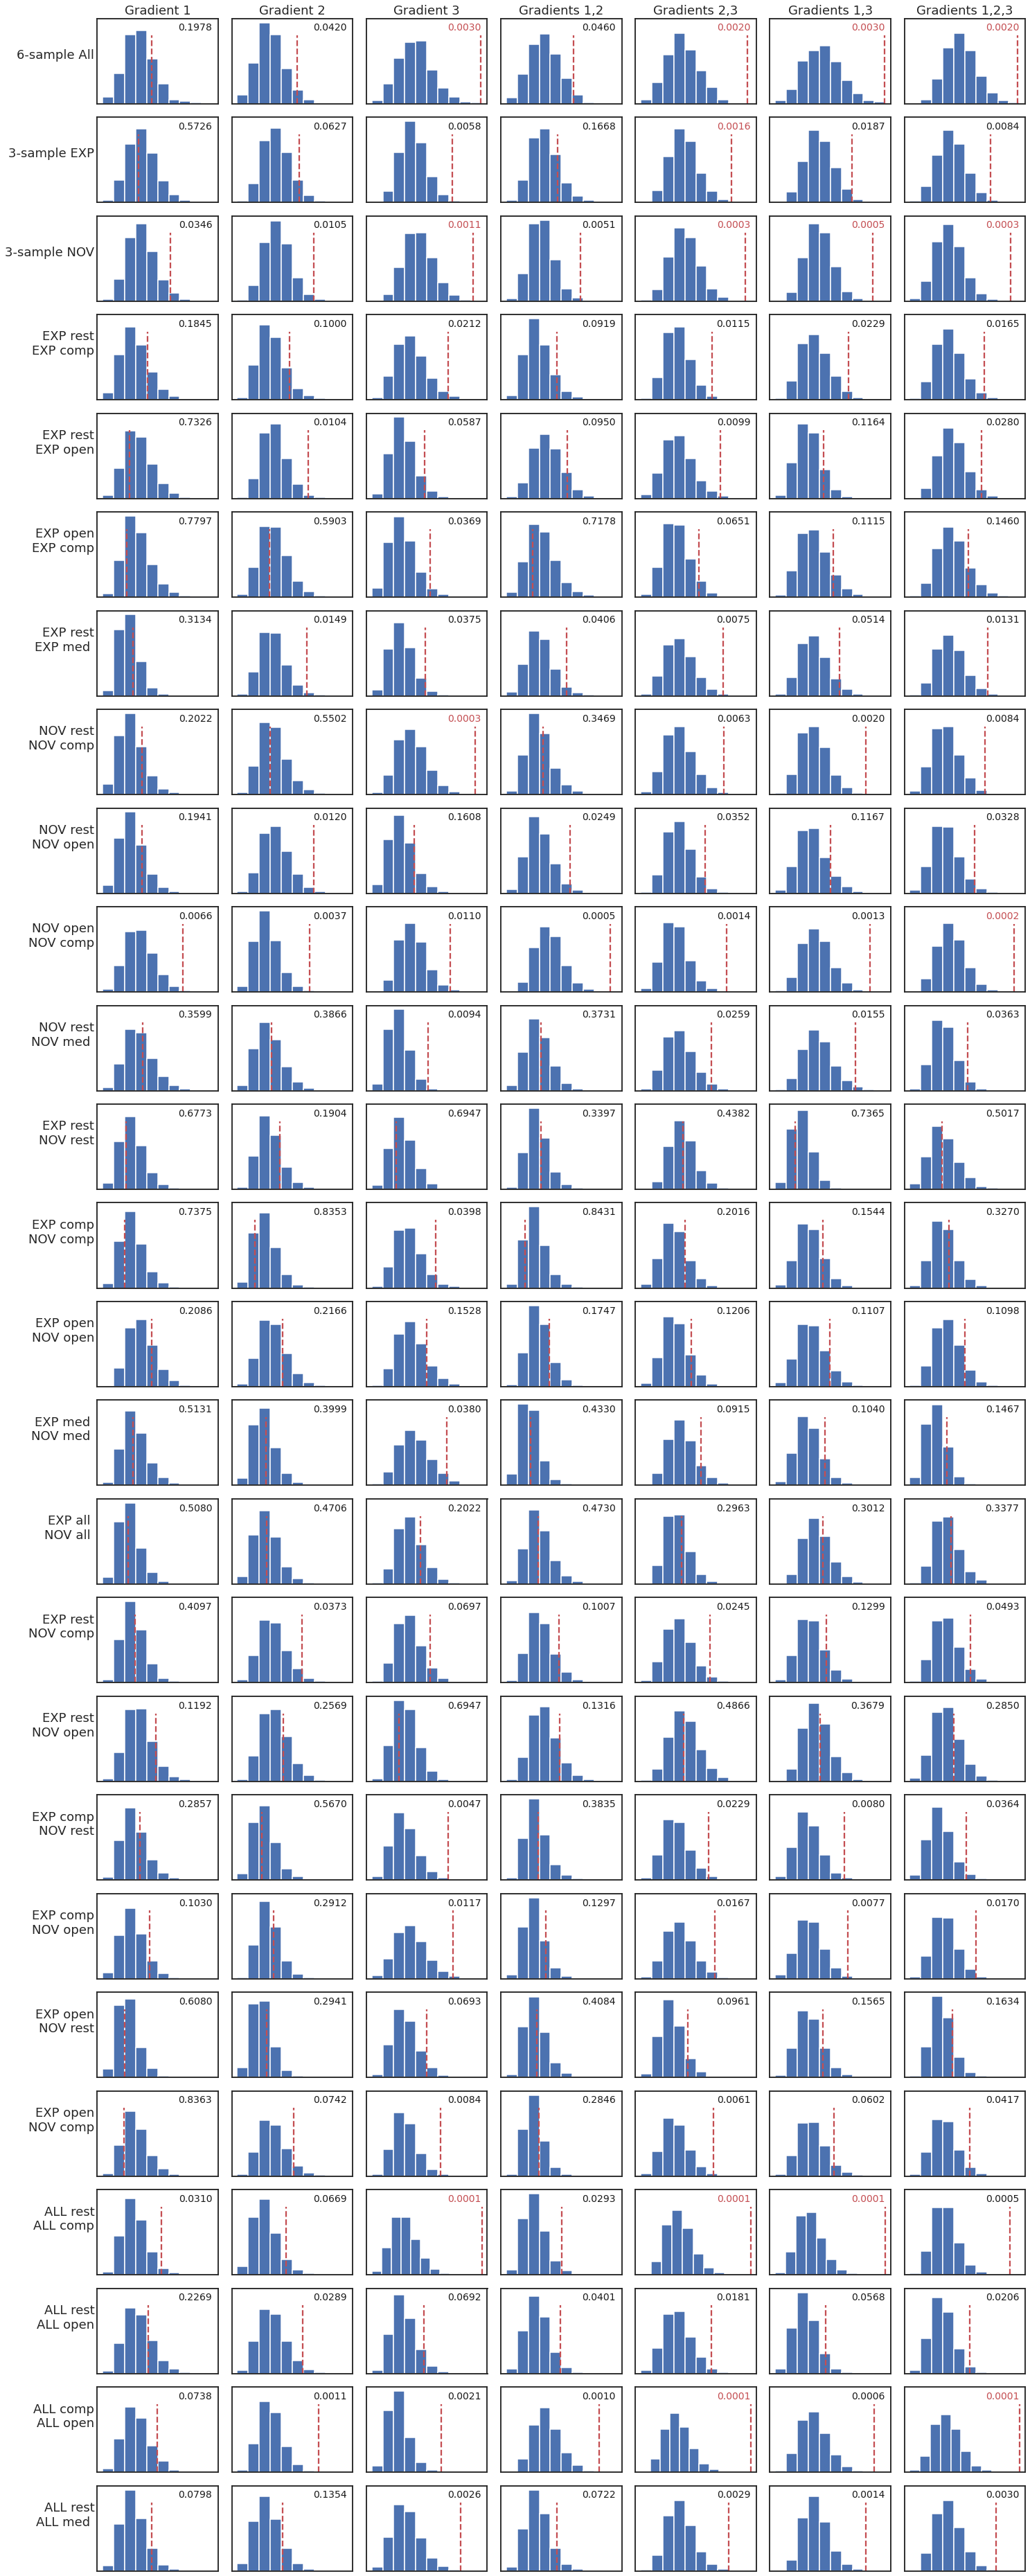

In [14]:
nrows = len(tests_dict.keys())
fig, axes = plt.subplots(nrows, 7, sharex=False, sharey='row', figsize=(21,int(2*nrows)))
axes = axes.reshape(-1, 7)

for row, (test_key, test_dict) in enumerate(tests_dict.items()):
    test_name = name_dict[test_key]
    if isinstance(test_name, list):
        test_name = "{} {}\n{} {}".format(
            *[label_dict[label] for label in test_name])
    
    if '6' in test_name:
        scale = 7
    elif '3' in test_name:
        scale = 7 * 2
    else:
        scale = 7 * (nrows - 3)
        
    for col, (grad_key, grad_dict) in enumerate(test_dict.items()):
        ax = axes[row, col]
    
        ax.hist(grad_dict['null_dist']) #Histogram
        ax.axvline(grad_dict['test_stat'], c='r', ls='--', ymax=0.8) # Test stat
        
        pvalue = grad_dict['pvalue']
        ax.annotate(f"{pvalue:.4f}", xy=(0.95, 0.95), xycoords='axes fraction',
                    ha='right', va='top', size=14, c='r' if pvalue < 0.05 / scale else 'k')#, bbox=dict(boxstyle='square', fc='w'))
        # ax.set_title(f'{key} ({grad_key}): pval={data_dict[test_key][grad_key]["pvalue"]}') #

        if row == 0:
            ax.set_title(name_dict[f"Gradients {grad_key}"])
        ax.set_xticks([])
        ax.set_yticks([])
    axes[row, 0].set_ylabel(test_name, rotation='horizontal', ha='right')

# for ax in axes[-1, :]:
#     plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
# fig.subplots_adjust(hspace=0.4)
# fig.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.savefig(data_dir / "DCORR_gcca_raw_ZG3-min_normed_nulldists.pdf")
plt.show()